<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito+Sans&family=Quicksand&display=swap" rel="stylesheet">

<div display="flex" align="center" justify-content="center" width="100%">

<!-- <img height=80 src="https://drive.google.com/uc?id=13kMLUyF9yPOsfMB782I1wk-_pYNiyxkI"> </img> -->
</div>

<div style="font-family: 'Nunito Sans', sans-serif;">
    
# **Clustering**
---
    
</div> 

<div  style="font-size: 22px; color:black; font-family: 'Quicksand', sans-serif;font-weight:500">

Author : Thivin Anandh D 


</div>


<div  style="font-size: 18px; color:black; font-family: 'Quicksand', sans-serif;font-weight:400">
<a href="https://www.linkedin.com/in/thivinanandh/" > Linkedin 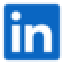</a>
<a href="https://github.com/thivinanandh" > Github 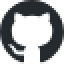</a>

For opening this notebook in google colab, please click on the button below.<br />
<br />
<a href="https://colab.research.google.com/github/thivinanandh/Teaching-Python/blob/main/ML-Algorithms/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

</div>


# Introduction to Clustering in Machine Learning

## What is Clustering?

Clustering is an unsupervised machine learning technique that involves grouping similar data points together based on their characteristics or features. The goal of clustering is to divide a dataset into subgroups (clusters) where:

1. Data points within the same cluster are as similar as possible.
2. Data points in different clusters are as dissimilar as possible.

Unlike supervised learning, clustering doesn't rely on predefined labels or outcomes. Instead, it discovers inherent structures or patterns in the data.

## Why is Clustering Needed?

Clustering serves several important purposes in data analysis and machine learning:

1. **Data Exploration**: It helps in understanding the underlying structure of data, revealing patterns that might not be immediately apparent.

2. **Dimensionality Reduction**: By grouping similar data points, clustering can be used as a form of compression, reducing the complexity of the dataset.

3. **Anomaly Detection**: Clustering can identify outliers or unusual data points that don't fit well into any cluster.

4. **Customer Segmentation**: In marketing, clustering helps in dividing customers into groups with similar behaviors or characteristics.

5. **Image Segmentation**: In computer vision, clustering is used to partition images into meaningful regions.

6. **Recommendation Systems**: Clustering can group similar items or users, aiding in generating recommendations.

7. **Genetics**: In biology, clustering helps in grouping genes with similar expression patterns.

## Types of Clustering Algorithms

There are several types of clustering algorithms, each with its own approach and suitable for different types of data and problems:

1. **Centroid-based Clustering** (e.g., K-Means): Represents clusters by a central vector.
2. **Hierarchical Clustering**: Builds a tree of clusters, either top-down (divisive) or bottom-up (agglomerative).
3. **Density-based Clustering** (e.g., DBSCAN): Defines clusters as areas of high density separated by areas of low density.
4. **Distribution-based Clustering** (e.g., Gaussian Mixture Models): Assumes data is generated from a mixture of probability distributions.

## Challenges in Clustering

While clustering is a powerful technique, it comes with challenges:

1. **Determining the Optimal Number of Clusters**: Many algorithms require specifying the number of clusters in advance.
2. **Handling Different Scales**: Features with larger scales can dominate the clustering process.
3. **Dealing with High-Dimensional Data**: As dimensions increase, the concept of distance becomes less meaningful.
4. **Interpreting Results**: Understanding and labeling the resulting clusters can be subjective.

In the following sections, we'll explore different clustering algorithms, their implementations, and techniques to address these challenges.

# K-Means Clustering
---


K-Means is one of the simplest and most popular unsupervised machine learning algorithms. It's a centroid-based algorithm, meaning it represents the clusters by a central vector, which may not necessarily be a member of the dataset.

## The Algorithm

K-Means divides a set of n samples X into K disjoint clusters C, each described by the mean μj of the samples in the cluster. The means are commonly called the cluster "centroids".

The K-Means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion:

$$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2) $$

where $x_i$ is the i-th sample and $\mu_j$ is the centroid of cluster j.

### Steps of the Algorithm:

1. **Initialization**: Choose K initial centroids.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recalculate centroids of new clusters.
4. **Repeat**: Iterate steps 2-3 until convergence or a maximum number of iterations is reached.

Mathematically, in the assignment step, we assign each observation to the cluster with the nearest mean:

$$ C_i^{(t)} = \{x_p : ||x_p - m_i^{(t)}||^2 \leq ||x_p - m_j^{(t)}||^2 \quad \forall j, 1 \leq j \leq k\} $$

where $C_i^{(t)}$ is the i-th cluster at iteration t.

In the update step, we calculate the new means to be the centroids of the observations in the new clusters:

$$ m_i^{(t+1)} = \frac{1}{|C_i^{(t)}|} \sum_{x_j \in C_i^{(t)}} x_j $$

## Initialization Problem

The choice of initial centroids can significantly affect the final clusters. Poor initialization can lead to suboptimal solutions or slower convergence. Common initialization methods include:

1. **Random Initialization**: Randomly select K data points as initial centroids.
2. **K-Means++**: A smarter initialization that spreads out initial centroids.
3. **Forgy Method**: Randomly choose K observations from the dataset.

K-Means++ is often preferred as it leads to better results than random initialization.

## Other Challenges and Considerations

1. **Choosing K**: The number of clusters K is an input parameter. Choosing an inappropriate K can lead to poor results.

2. **Local Optima**: K-Means can converge to local optima. Running the algorithm multiple times with different initializations can help.

3. **Sensitivity to Outliers**: As K-Means uses mean values, it can be sensitive to outliers.

4. **Cluster Shape**: K-Means assumes that clusters are spherical and equally sized, which may not always be the case.

5. **Scaling**: Features should be scaled before applying K-Means, as it uses Euclidean distance.

6. **Empty Clusters**: In rare cases, no points may be assigned to a centroid, creating an empty cluster.

## Advantages and Disadvantages

Advantages:
- Simple to understand and implement
- Scales well to large datasets
- Guarantees convergence

Disadvantages:
- Needs to specify number of clusters beforehand
- Sensitive to initial centroids
- Can perform poorly with non-globular clusters


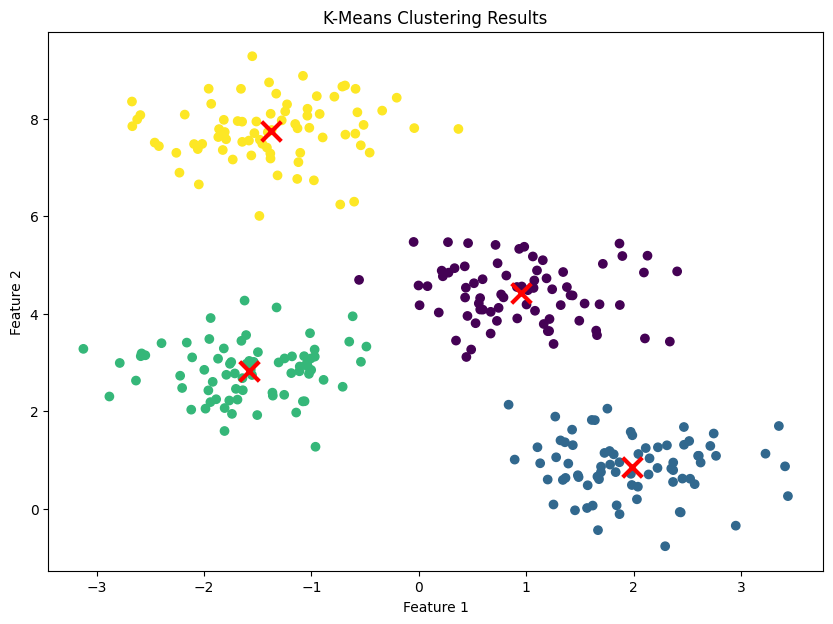

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    point1 (array): First point
    point2 (array): Second point

    Returns:
    float: Euclidean distance between point1 and point2
    """
    # Initialize the squared distance
    squared_distance = 0
    
    # Calculate the sum of squared differences for each dimension
    for i in range(len(point1)):
        squared_distance += (point1[i] - point2[i]) ** 2
    
    # Return the square root of the sum
    return np.sqrt(squared_distance)

def initialize_centroids(X, k):
    """
    Initialize k centroids randomly from the data points.

    Parameters:
    X (array): Input data
    k (int): Number of clusters

    Returns:
    array: k centroids
    """
    # Get the number of data points
    n_samples = X.shape[0]
    
    # Randomly choose k unique indices
    centroid_indices = np.random.choice(n_samples, k, replace=False)
    
    # Return the data points at these indices as initial centroids
    return X[centroid_indices]

def assign_clusters(X, centroids):
    """
    Assign each data point to the nearest centroid.

    Parameters:
    X (array): Input data
    centroids (array): Current centroids

    Returns:
    array: Cluster assignments for each data point
    """
    # Initialize an array to store cluster assignments
    cluster_assignments = np.zeros(X.shape[0], dtype=int)
    
    # For each data point
    for i in range(X.shape[0]):
        # Initialize variables to keep track of the nearest centroid
        min_distance = float('inf')
        nearest_centroid = 0
        
        # Check distance to each centroid
        for j in range(len(centroids)):
            distance = euclidean_distance(X[i], centroids[j])
            
            # If this centroid is closer, update the nearest centroid
            if distance < min_distance:
                min_distance = distance
                nearest_centroid = j
        
        # Assign the data point to the nearest centroid
        cluster_assignments[i] = nearest_centroid
    
    return cluster_assignments

def update_centroids(X, cluster_assignments, k):
    """
    Update the centroids based on the current cluster assignments.

    Parameters:
    X (array): Input data
    cluster_assignments (array): Current cluster assignments
    k (int): Number of clusters

    Returns:
    array: Updated centroids
    """
    # Initialize new centroids
    new_centroids = np.zeros((k, X.shape[1]))
    
    # For each cluster
    for i in range(k):
        # Get all points assigned to this cluster
        cluster_points = X[cluster_assignments == i]
        
        # If the cluster is not empty, calculate the mean
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
    
    return new_centroids

def kmeans(X, k, max_iterations=100):
    """
    Perform K-Means clustering.

    Parameters:
    X (array): Input data
    k (int): Number of clusters
    max_iterations (int): Maximum number of iterations

    Returns:
    array: Final cluster assignments
    array: Final centroids
    """
    # Initialize centroids
    centroids = initialize_centroids(X, k)
    
    # Iterate until convergence or max iterations
    for _ in range(max_iterations):
        # Assign clusters
        cluster_assignments = assign_clusters(X, centroids)
        
        # Update centroids
        new_centroids = update_centroids(X, cluster_assignments, k)
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return cluster_assignments, centroids

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means
k = 4
cluster_assignments, centroids = kmeans(X, k)

# Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Code with Sklearn

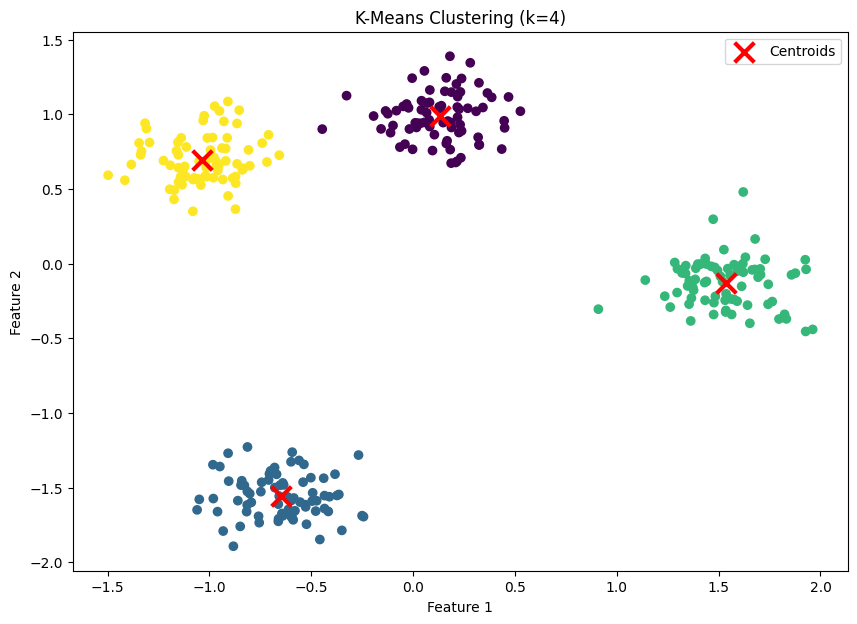

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(42)

def generate_data(n_samples=300, n_features=2, n_centers=4, cluster_std=1.0):
    """
    Generate sample data for clustering.

    Parameters:
    n_samples (int): Number of samples to generate
    n_features (int): Number of features for each sample
    n_centers (int): Number of centers (true clusters) to generate
    cluster_std (float): Standard deviation of the clusters

    Returns:
    X (array): Generated samples
    y (array): True labels (only for reference, not used in clustering)
    """
    X, y = make_blobs(n_samples=n_samples, 
                      n_features=n_features, 
                      centers=n_centers, 
                      cluster_std=cluster_std, 
                      random_state=42)
    return X, y

def preprocess_data(X):
    """
    Preprocess the data by scaling features.

    Parameters:
    X (array): Input data

    Returns:
    array: Scaled data
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def perform_kmeans(X, n_clusters):
    """
    Perform K-Means clustering.

    Parameters:
    X (array): Input data
    n_clusters (int): Number of clusters

    Returns:
    KMeans: Fitted K-Means model
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    return kmeans

def plot_clusters(X, kmeans, title):
    """
    Plot the clustering results.

    Parameters:
    X (array): Input data
    kmeans (KMeans): Fitted K-Means model
    title (str): Title for the plot
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                marker='x', s=200, linewidths=3, color='r', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()



# Main execution
if __name__ == "__main__":
    # Generate and preprocess data
    X, _ = generate_data()
    X_scaled = preprocess_data(X)

    # Perform K-Means clustering
    n_clusters = 4  # You can change this value
    kmeans = perform_kmeans(X_scaled, n_clusters)

    # Plot clustering results
    plot_clusters(X_scaled, kmeans, f'K-Means Clustering (k={n_clusters})')

# Picking the Optimal Number of Clusters
---

One of the main challenges in K-Means clustering is determining the optimal number of clusters (K). Two popular methods for this are the Elbow Method and Silhouette Analysis.

## Elbow Method

The Elbow Method looks at the total within-cluster sum of squares (WSS) as a function of the number of clusters. WSS is defined as:

$$ WSS = \sum_{k=1}^K \sum_{x \in C_k} (x - \mu_k)^2 $$

Where:
- K is the number of clusters
- $C_k$ is the k-th cluster
- $x$ is a point in $C_k$
- $\mu_k$ is the centroid of $C_k$

### Steps:

1. Compute K-Means clustering for different values of K (e.g., 1 to 10)
2. For each K, calculate the total within-cluster sum of squares (WSS)
3. Plot the curve of WSS vs. the number of clusters K
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters

### Interpretation:

As K increases, the WSS tends to decrease. The optimal K is often at the "elbow" point, where adding another cluster doesn't significantly decrease the WSS.

### Limitations:

- The "elbow" can be ambiguous if the curve is smooth
- It may not work well if the data has overlapping clusters

## Silhouette Analysis

Silhouette analysis measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where:
- A high value indicates the object is well matched to its own cluster and poorly matched to neighboring clusters
- A value near 0 indicates the object is on or very close to the decision boundary between two neighboring clusters
- Negative values indicate the object might have been assigned to the wrong cluster

### Silhouette Score Calculation:

For each data point i, calculate:

1. a(i) = average distance between i and all other points in the same cluster
2. b(i) = minimum average distance between i and all points in any other cluster

The silhouette score s(i) for a single sample is then given by:

$$ s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} $$

The mean silhouette score for all points is used as a measure of clustering quality.

### Steps for Silhouette Analysis:

1. Compute K-Means clustering for different values of K
2. For each K, calculate the average silhouette score across all data points
3. Plot the silhouette scores vs. the number of clusters K
4. The K with the highest silhouette score is often considered optimal

### Interpretation:

- Higher silhouette scores indicate better-defined clusters
- Look for the number of clusters that maximizes the average silhouette score

### Advantages:

- Provides a quantitative way to compare different clusterings
- Can be used with any distance metric

### Limitations:

- Computationally expensive for large datasets
- May not work well for density-based clusters

## Using These Methods to Compute Optimal Clusters

1. **Implement Both Methods**: 
   - Run K-Means for a range of K values (e.g., 2 to 10)
   - For each K, compute both the WSS (for Elbow Method) and the average Silhouette Score

2. **Visualize Results**:
   - Plot the Elbow curve (WSS vs. K)
   - Plot the Silhouette Scores vs. K

3. **Analyze Plots**:
   - In the Elbow plot, look for the "elbow" point where the rate of decrease sharply shifts
   - In the Silhouette plot, look for the peak score

4. **Consider Both Methods**:
   - The optimal K might not be the same for both methods
   - Use domain knowledge to interpret the results

5. **Validate Results**:
   - Visualize the clustering results for the suggested optimal K values
   - Consider the practical implications of the number of clusters in your specific application

6. **Iterate if Necessary**:
   - If results are ambiguous, consider trying a different range of K values or using additional evaluation metrics

Remember, while these methods provide valuable insights, the "optimal" number of clusters can still be subjective and depend on the specific needs of your analysis or application.

Generating and preprocessing data...
Computing metrics for Elbow Method and Silhouette Analysis...
Plotting Elbow Curve and Silhouette Scores...


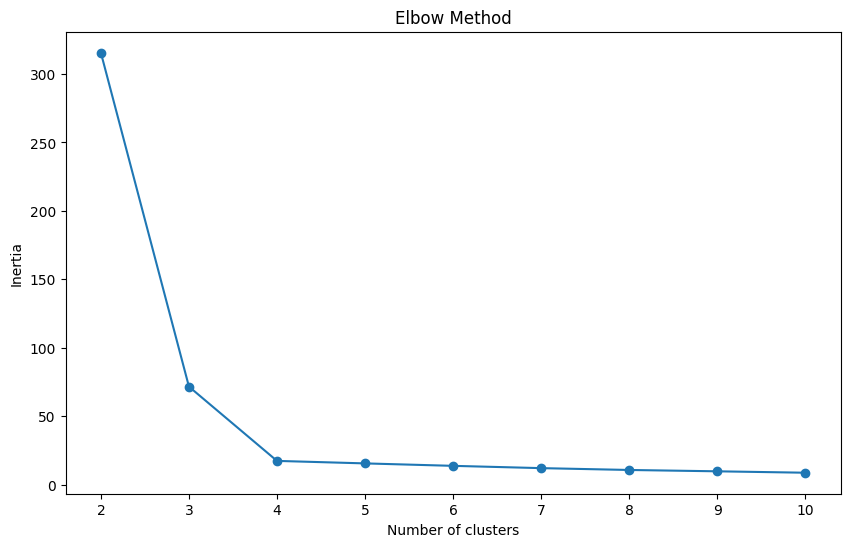

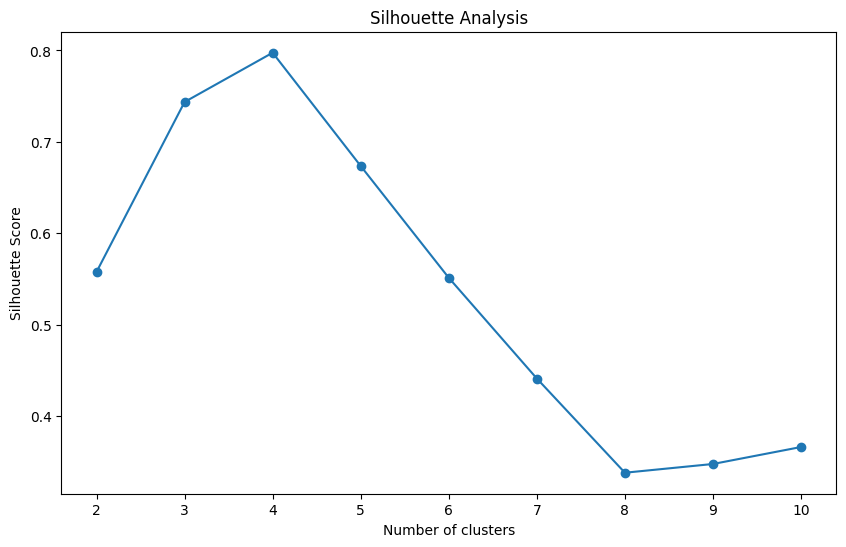

Determining optimal number of clusters...
Optimal number of clusters (Elbow Method): 2
Optimal number of clusters (Silhouette Analysis): 4
Visualizing clustering results...


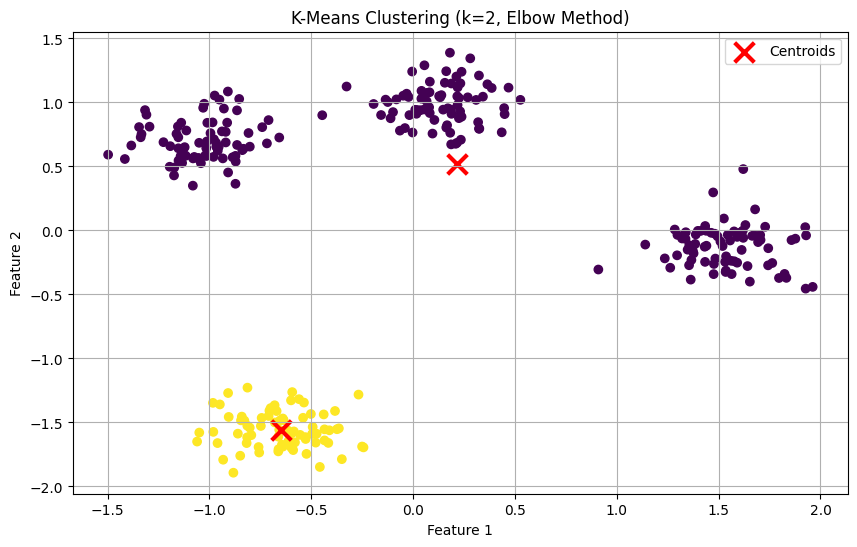

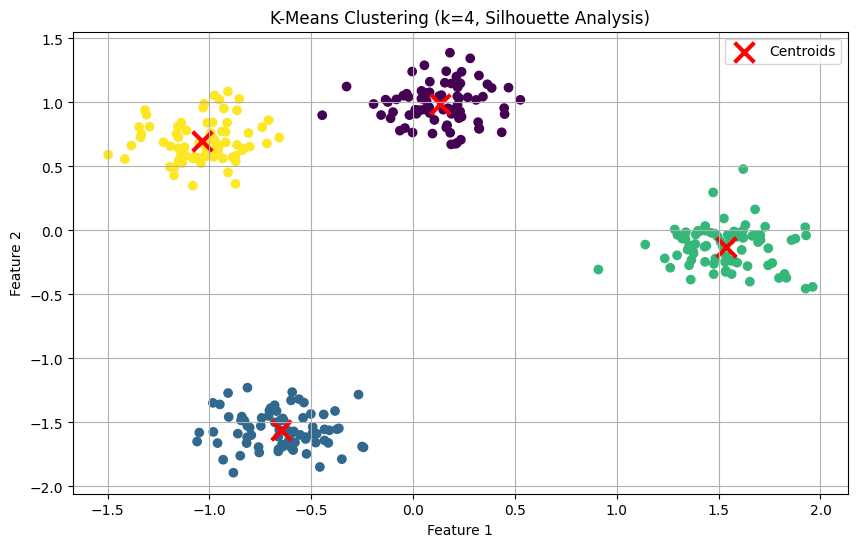

Analysis complete!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(42)

def generate_data(n_samples=300, n_features=2, n_centers=4, cluster_std=1.0):
    """
    Generate sample data for clustering.

    Parameters:
    n_samples (int): Number of samples to generate
    n_features (int): Number of features for each sample
    n_centers (int): Number of centers (true clusters) to generate
    cluster_std (float): Standard deviation of the clusters

    Returns:
    X (array): Generated samples
    y (array): True labels (only for reference, not used in clustering)
    """
    X, y = make_blobs(n_samples=n_samples, 
                      n_features=n_features, 
                      centers=n_centers, 
                      cluster_std=cluster_std, 
                      random_state=42)
    return X, y

def preprocess_data(X):
    """
    Preprocess the data by scaling features.

    Parameters:
    X (array): Input data

    Returns:
    array: Scaled data
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def compute_metrics(X, max_clusters=10):
    """
    Compute metrics for Elbow Method and Silhouette Analysis.

    Parameters:
    X (array): Input data
    max_clusters (int): Maximum number of clusters to try

    Returns:
    list: Inertia values for each number of clusters
    list: Silhouette scores for each number of clusters
    """
    inertias = []
    silhouette_scores = []

    for k in range(2, max_clusters + 1):
        # Perform K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        
        # Compute inertia (for Elbow Method)
        inertias.append(kmeans.inertia_)
        
        # Compute silhouette score
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

    return inertias, silhouette_scores

def plot_elbow_curve(inertias):
    """
    Plot the elbow curve.

    Parameters:
    inertias (list): Inertia values for each number of clusters
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, len(inertias) + 2), inertias, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

def plot_silhouette_scores(silhouette_scores):
    """
    Plot the silhouette scores.

    Parameters:
    silhouette_scores (list): Silhouette scores for each number of clusters
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    plt.title('Silhouette Analysis')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

def determine_optimal_clusters(inertias, silhouette_scores):
    """
    Determine the optimal number of clusters based on Elbow Method and Silhouette Analysis.

    Parameters:
    inertias (list): Inertia values for each number of clusters
    silhouette_scores (list): Silhouette scores for each number of clusters

    Returns:
    int: Optimal number of clusters based on Elbow Method
    int: Optimal number of clusters based on Silhouette Analysis
    """
    # Elbow Method: Find the elbow point
    # We'll use a simple heuristic: the point of maximum curvature
    curvature = np.diff(inertias, 2)
    elbow_point = curvature.argmax() + 2  # +2 because we started from 2 clusters

    # Silhouette Analysis: Find the maximum silhouette score
    silhouette_point = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from 2 clusters

    return elbow_point, silhouette_point

def plot_clusters(X, n_clusters, title):
    """
    Plot the clustering results.

    Parameters:
    X (array): Input data
    n_clusters (int): Number of clusters
    title (str): Title for the plot
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                marker='x', s=200, linewidths=3, color='r', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)  
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Step 1: Generate and preprocess data
    print("Generating and preprocessing data...")
    X, _ = generate_data()
    X_scaled = preprocess_data(X)

    # Step 2: Compute metrics for different numbers of clusters
    print("Computing metrics for Elbow Method and Silhouette Analysis...")
    max_clusters = 10
    inertias, silhouette_scores = compute_metrics(X_scaled, max_clusters)

    # Step 3: Plot the results
    print("Plotting Elbow Curve and Silhouette Scores...")
    plot_elbow_curve(inertias)
    plot_silhouette_scores(silhouette_scores)

    # Step 4: Determine the optimal number of clusters
    print("Determining optimal number of clusters...")
    elbow_point, silhouette_point = determine_optimal_clusters(inertias, silhouette_scores)
    print(f"Optimal number of clusters (Elbow Method): {elbow_point}")
    print(f"Optimal number of clusters (Silhouette Analysis): {silhouette_point}")

    # Step 5: Visualize clustering results
    print("Visualizing clustering results...")
    plot_clusters(X_scaled, elbow_point, f'K-Means Clustering (k={elbow_point}, Elbow Method)')
    plot_clusters(X_scaled, silhouette_point, f'K-Means Clustering (k={silhouette_point}, Silhouette Analysis)')

    print("Analysis complete!")

# DBSCAN: Density-Based Spatial Clustering of Applications with Noise
---

DBSCAN is a popular clustering algorithm that is particularly effective for data with arbitrary shaped clusters and the ability to identify noise points.

## Introduction to DBSCAN

DBSCAN groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

## Key Concepts

1. **Epsilon (ε)**: The maximum distance between two samples for them to be considered as in the same neighborhood.

2. **MinPts**: The number of samples in a neighborhood for a point to be considered as a core point.

3. **Core Point**: A point that has at least MinPts points within distance ε of it.

4. **Border Point**: A point that has fewer than MinPts within distance ε, but is in the neighborhood of a core point.

5. **Noise Point**: Any point that is neither a core point nor a border point.

## How DBSCAN Works

1. For each point in the dataset:
   a. If the point is not yet classified, check if it's a core point.
   b. If it's a core point, start a new cluster and expand it by adding all directly density-reachable points.
   c. If it's not a core point and not density-reachable from any other point, mark it as noise.

2. Repeat until all points have been processed.

## Advantages of DBSCAN

1. Does not require specifying the number of clusters a priori.
2. Can find arbitrarily shaped clusters.
3. Has a notion of noise, and is robust to outliers.
4. Only requires two parameters and is mostly insensitive to the ordering of the points in the database.

## Limitations of DBSCAN

1. Struggles with clusters of varying densities.
2. Can have trouble with high-dimensional data due to the "curse of dimensionality".
3. The choice of distance metric is crucial and can significantly affect results.
4. Determining optimal ε and MinPts can be challenging.

## Choosing Parameters

1. **Epsilon (ε)**:
   - Can be estimated using a k-distance graph.
   - Plot the distances to the k-th nearest neighbor in ascending order.
   - Look for the "elbow" in this plot, which suggests a good ε value.

2. **MinPts**:
   - Generally, a larger MinPts produces more significant clusters.
   - Rule of thumb: MinPts ≥ dimensionality + 1. Common choices are 3 or 4 for 2D data.

## DBSCAN vs. K-Means

| Aspect | DBSCAN | K-Means |
|--------|--------|---------|
| Number of Clusters | Automatically determined | Must be specified |
| Cluster Shape | Arbitrary | Tends to find spherical clusters |
| Outlier Handling | Identifies noise points | Sensitive to outliers |
| Cluster Size | Can handle varying sizes | Tends to produce equal-sized clusters |
| Density Sensitivity | Works well with varying densities | Assumes uniform density |

## Applications of DBSCAN

1. Anomaly detection in large datasets
2. Clustering for spatial databases
3. Image segmentation
4. Market segmentation in marketing analytics
5. Traffic pattern analysis

## Implementing DBSCAN

DBSCAN can be implemented using various libraries, with scikit-learn being a popular choice in Python. The key parameters to set are `eps` (ε) and `min_samples` (MinPts).


Generating and preprocessing data...
Computing suitable epsilon...
Suggested epsilon: 0.2704
Performing DBSCAN...
Plotting results...


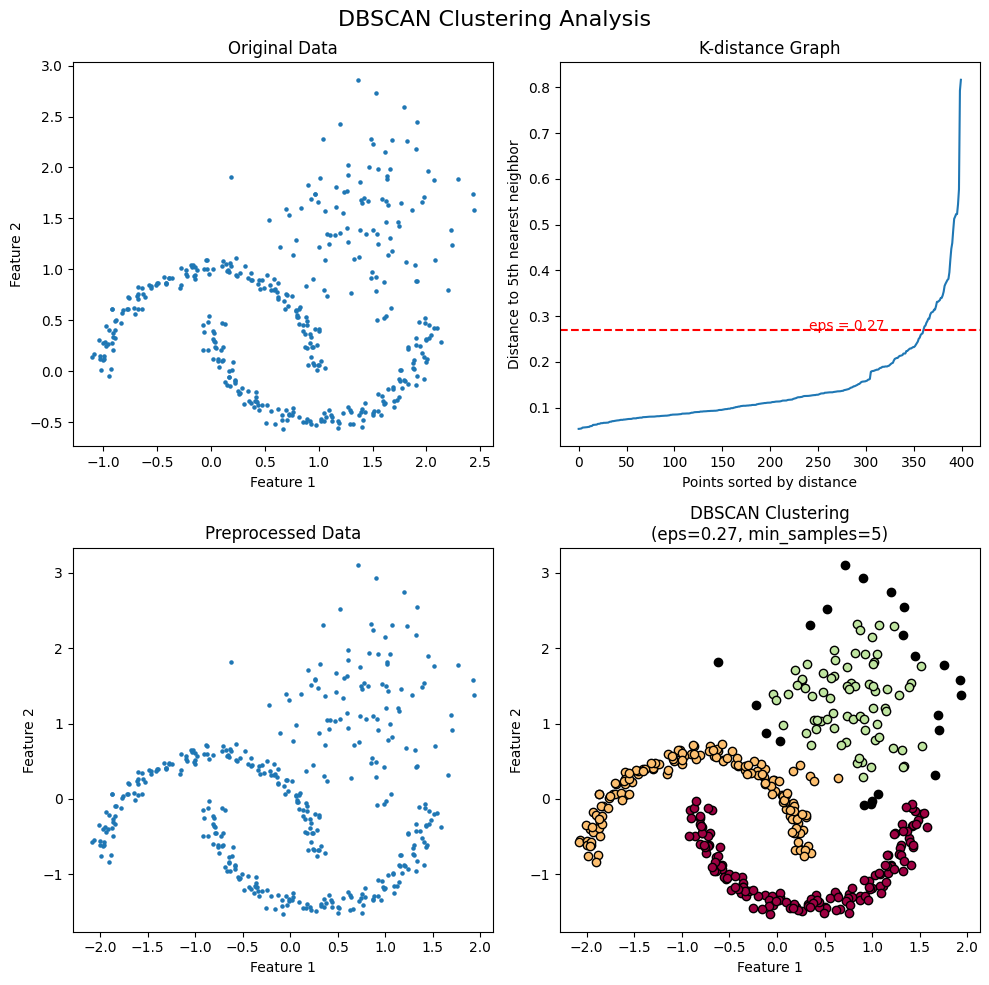

Number of clusters: 3
Number of noise points: 22
Analysis complete!


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_blobs
from sklearn.neighbors import NearestNeighbors

def generate_data(n_samples=300, noise=0.05, random_state=42):
    # Generate a dataset with two interleaving half circles
    X1, _ = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
    
    # Generate a blob-like dataset
    X2, _ = make_blobs(n_samples=n_samples//3, centers=[[1.5, 1.5]], cluster_std=0.5, random_state=random_state)
    
    # Combine the two datasets
    X = np.vstack((X1, X2))
    return X

def preprocess_data(X):
    # Create a StandardScaler object
    scaler = StandardScaler()
    
    # Fit the scaler to the data and transform it
    # This scales the data so each feature has mean 0 and variance 1
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def compute_eps(X, n_neighbors=5):
    # Create a NearestNeighbors object
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    
    # Fit the NearestNeighbors object to the data
    nbrs = neigh.fit(X)
    
    # Find the distances to the n-th nearest neighbor for each point
    distances, _ = nbrs.kneighbors(X)
    
    # Sort the distances
    distances = np.sort(distances, axis=0)
    
    # Get the distance to the n-th nearest neighbor
    distances = distances[:, -1]
    
    # Return all distances and a suggested epsilon (90th percentile of distances)
    return distances, distances[int(len(distances) * 0.9)]

def perform_dbscan(X, eps, min_samples):
    # Create a DBSCAN object with the given parameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    
    # Fit the DBSCAN object to the data
    dbscan.fit(X)
    return dbscan

def plot_all(X, X_scaled, distances, eps, dbscan):
    # Create a figure with 2x2 subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('DBSCAN Clustering Analysis', fontsize=16)

    # Plot 1: Original Data
    axs[0, 0].scatter(X[:, 0], X[:, 1], s=5)
    axs[0, 0].set_title('Original Data')
    axs[0, 0].set_xlabel('Feature 1')
    axs[0, 0].set_ylabel('Feature 2')

    # Plot 2: K-distance Graph
    axs[0, 1].plot(distances)
    axs[0, 1].set_title('K-distance Graph')
    axs[0, 1].set_xlabel('Points sorted by distance')
    axs[0, 1].set_ylabel('Distance to 5th nearest neighbor')
    axs[0, 1].axhline(y=eps, color='r', linestyle='--')
    axs[0, 1].text(len(distances)*0.6, eps, f'eps = {eps:.2f}', color='r')

    # Plot 3: Preprocessed Data
    axs[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], s=5)
    axs[1, 0].set_title('Preprocessed Data')
    axs[1, 0].set_xlabel('Feature 1')
    axs[1, 0].set_ylabel('Feature 2')

    # Plot 4: DBSCAN Clustering Results
    unique_labels = set(dbscan.labels_)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = 'k'
        class_member_mask = (dbscan.labels_ == k)
        xy = X_scaled[class_member_mask]
        axs[1, 1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    axs[1, 1].set_title(f'DBSCAN Clustering\n(eps={eps:.2f}, min_samples=5)')
    axs[1, 1].set_xlabel('Feature 1')
    axs[1, 1].set_ylabel('Feature 2')

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Generating and preprocessing data...")
    # Generate synthetic data
    X = generate_data()
    # Preprocess (scale) the data
    X_scaled = preprocess_data(X)

    print("Computing suitable epsilon...")
    # Compute the distances to the 5th nearest neighbor for each point
    distances, eps = compute_eps(X_scaled)
    print(f"Suggested epsilon: {eps:.4f}")

    print("Performing DBSCAN...")
    # Set the minimum number of samples in a neighborhood for a point to be considered as a core point
    min_samples = 5
    # Perform DBSCAN clustering
    dbscan = perform_dbscan(X_scaled, eps, min_samples)

    print("Plotting results...")
    # Create visualizations of the data and clustering results
    plot_all(X, X_scaled, distances, eps, dbscan)

    # Count the number of clusters found
    # -1 is the label for noise points, so we subtract 1 if noise is present
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    # Count the number of noise points
    n_noise = list(dbscan.labels_).count(-1)
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise}")

    print("Analysis complete!")

# Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It's a popular alternative to partitioning algorithms like K-Means, especially when the number of clusters is not known in advance.

## Types of Hierarchical Clustering

There are two main types of hierarchical clustering:

1. **Agglomerative** (bottom-up approach): Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

2. **Divisive** (top-down approach): All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

Agglomerative clustering is more common and will be our focus.

## Agglomerative Hierarchical Clustering Algorithm

1. Start with N clusters, each containing exactly one entity.
2. Calculate the distance (similarity) between each of the clusters.
3. Merge the two clusters that are closest to each other.
4. Repeat steps 2 and 3 until all items are clustered into a single cluster of size N.

## Distance Metrics

Common distance metrics include:

- Euclidean distance
- Manhattan distance
- Cosine similarity

## Linkage Methods

Linkage methods determine how the distance between clusters is calculated:

1. **Single Linkage**: The distance between two clusters is the shortest distance between any member of one cluster to any member of the other cluster.

2. **Complete Linkage**: The distance between two clusters is the longest distance between any member of one cluster to any member of the other cluster.

3. **Average Linkage**: The distance between two clusters is the average distance between each point in one cluster to every point in the other cluster.

4. **Ward's Method**: Minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach.

## Dendrogram

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is the main visualization tool for hierarchical clustering results.

## Advantages of Hierarchical Clustering

1. No need to specify the number of clusters in advance.
2. Hierarchical representation can be very informative.
3. Provides multiple partitions depending on the chosen cut of the dendrogram.

## Disadvantages of Hierarchical Clustering

1. Computationally intensive for large datasets (O(n^3) time complexity).
2. Sensitive to noise and outliers.
3. Once a merge or split is done, it can't be undone (no backtracking).

## Choosing the Number of Clusters

1. **Dendrogram Inspection**: Look for the longest vertical distance without horizontal lines crossing it.
2. **Elbow Method**: Plot the number of clusters against the total within-cluster sum of squares.
3. **Silhouette Analysis**: Measure how similar an object is to its own cluster compared to other clusters.

## Applications

1. Taxonomy creation in biology
2. Customer segmentation in marketing
3. Document clustering in information retrieval
4. Image segmentation in computer vision


In the next section, we'll implement hierarchical clustering, visualize the dendrogram, and explore techniques for determining the optimal number of clusters.

Generating data...
Preprocessing data...
Plotting dendrogram...


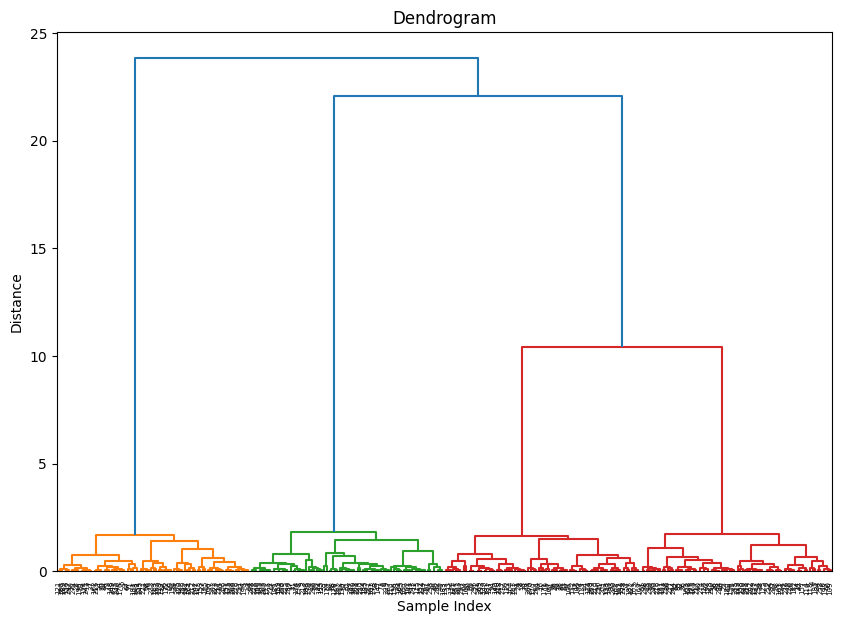

Performing hierarchical clustering...
Plotting clustering results...


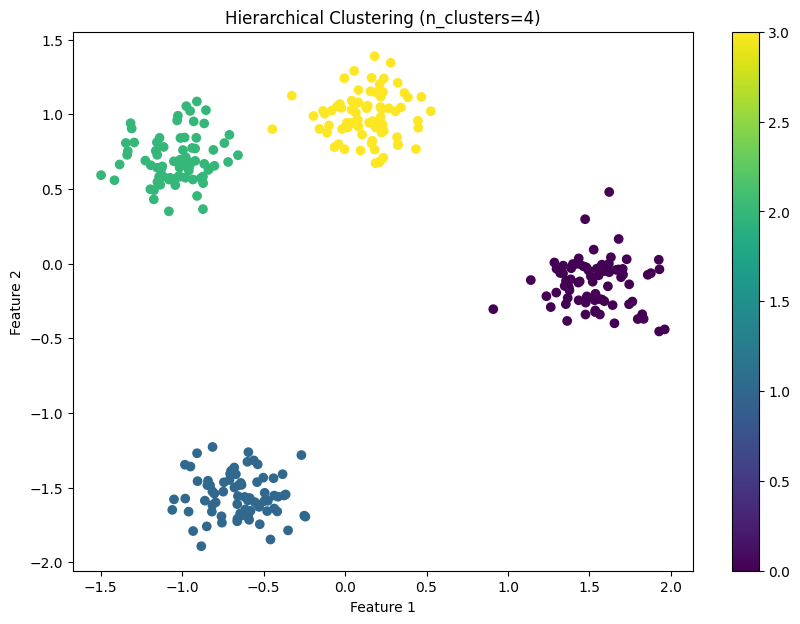

Plotting dendrogram with cut-off line...


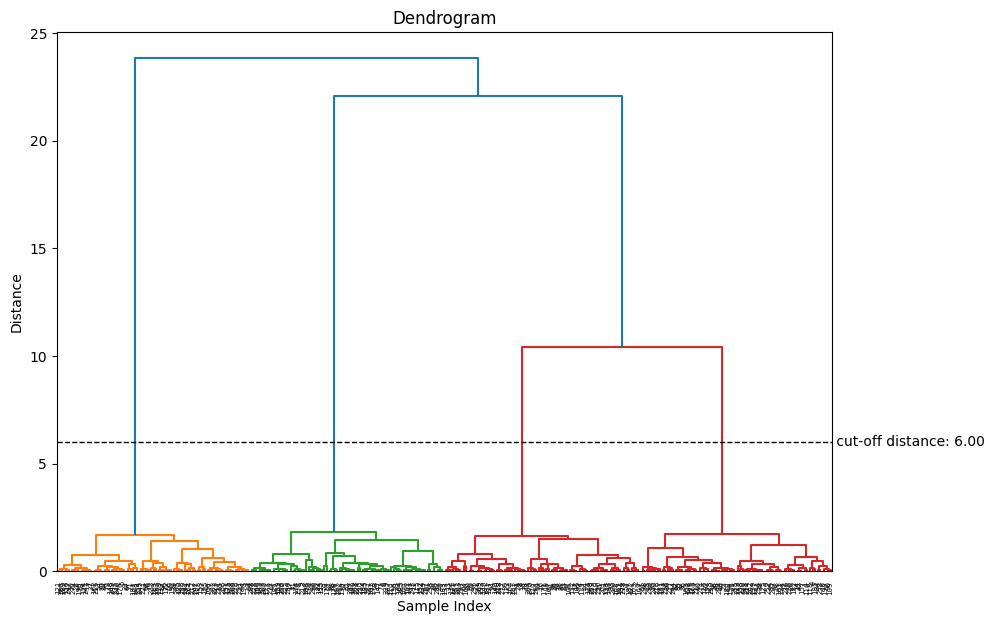

Analysis complete!


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Set random seed for reproducibility
np.random.seed(42)

def generate_data(n_samples=300, n_features=2, centers=4, cluster_std=1.0):
    """
    Generate sample data for clustering using sklearn's make_blobs function.

    This function creates a dataset with a specified number of samples, features,
    and clusters. The generated data is suitable for testing clustering algorithms.

    Parameters:
    n_samples (int): Number of samples to generate. Default is 300.
    n_features (int): Number of features for each sample. Default is 2 for easy visualization.
    centers (int): Number of centers (clusters) to generate. Default is 4.
    cluster_std (float): Standard deviation of the clusters. Default is 1.0.

    Returns:
    tuple: A tuple containing two numpy arrays:
        - X (array): Generated samples. Shape is (n_samples, n_features).
        - y (array): True labels corresponding to the generated samples. 
                     Shape is (n_samples,). Note: These labels are not used 
                     in the clustering process but can be useful for evaluation.

    Note: The random state is set to 42 for reproducibility.
    """
    # Generate the data
    # n_samples: The number of samples to generate.
    # n_features: The number of features for each sample.
    # centers: The number of centers (clusters) to generate.
    # cluster_std: The standard deviation of the clusters.
    # random_state: The random state for reproducibility.
    X, y = make_blobs(n_samples=n_samples, 
                      n_features=n_features, 
                      centers=centers, 
                      cluster_std=cluster_std, 
                      random_state=42)
    return X, y

def preprocess_data(X):
    """
    Preprocess the data by scaling features using StandardScaler.

    This function standardizes features by removing the mean and scaling to unit variance.
    Standardization is important for many machine learning algorithms, including
    hierarchical clustering, as it ensures all features contribute equally to the result.

    Parameters:
    X (array): Input data to be scaled. Shape should be (n_samples, n_features).

    Returns:
    array: Scaled data with the same shape as the input.

    Note: StandardScaler is fit to X and then used to transform X. The same scaler
    can be used to transform new data for consistency.
    """
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Fit the scaler to the data and transform the data
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled

def plot_dendrogram(X, max_d=None):
    """
    Plot the dendrogram for hierarchical clustering.

    This function computes the linkage matrix using Ward's method and then
    plots the corresponding dendrogram. The dendrogram visualizes the 
    hierarchical relationship between clusters.

    Parameters:
    X (array): Input data. Shape should be (n_samples, n_features).
    max_d (float, optional): Maximum distance for horizontal cut-off line.
                             If provided, a dashed line will be drawn at this height.

    The function doesn't return anything but displays the plot.

    Note: 
    - The x-axis represents the sample indices.
    - The y-axis represents the distance at which clusters are merged.
    - The 'ward' method minimizes the variance of the clusters being merged.
    """
    # Compute the linkage matrix using Ward's method
    # method='ward' minimizes the variance of the clusters being merged.
    # metric='euclidean' uses the Euclidean distance metric.
    # metric='cosine' uses the cosine similarity metric.
    # metric='manhattan' uses the Manhattan distance metric.
    # metric='haversine' uses the Haversine distance metric for geographical data.
    # For more details, refer to the scipy.cluster.hierarchy.linkage documentation.
    linkage_matrix = linkage(X, method='ward')

    # Create a new figure
    plt.figure(figsize=(10, 7))
    
    # Plot the dendrogram
    dendrogram(linkage_matrix)
    
    # Set the title and labels
    plt.title('Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    # If a maximum distance is provided, draw a cut-off line
    if max_d:
        plt.axhline(y=max_d, c='k', ls='--', lw=1)
        plt.text(plt.xlim()[1], max_d, f' cut-off distance: {max_d:.2f}', 
                 va='center', ha='left')

    # Display the plot
    plt.show()

def perform_hierarchical_clustering(X, n_clusters):
    """
    Perform hierarchical clustering using AgglomerativeClustering.

    This function applies the AgglomerativeClustering algorithm to the input data.
    It uses Ward's method for linkage, which minimizes the variance of the clusters
    being merged.

    Parameters:
    X (array): Input data. Shape should be (n_samples, n_features).
    n_clusters (int): Number of clusters to find.

    Returns:
    AgglomerativeClustering: Fitted clustering model.

    Note: The number of clusters is specified in advance, which determines
    where the dendrogram is cut to form clusters.
    """
    # Initialize the AgglomerativeClustering model
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    
    # Fit the model to the data
    clustering.fit(X)
    
    return clustering

def plot_clusters(X, clustering, title):
    """
    Plot the clustering results.

    This function creates a scatter plot of the data points, colored according
    to their assigned clusters.

    Parameters:
    X (array): Input data. Shape should be (n_samples, n_features).
    clustering (AgglomerativeClustering): Fitted clustering model.
    title (str): Title for the plot.

    The function doesn't return anything but displays the plot.

    Note: This function assumes 2D data for visualization. For higher dimensional
    data, you might need to use dimensionality reduction techniques before plotting.
    """
    # Create a new figure
    plt.figure(figsize=(10, 7))
    
    # Create a scatter plot. The color of each point is determined by its cluster label.
    scatter = plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Add a color bar to show the mapping of colors to cluster labels
    plt.colorbar(scatter)
    
    # Display the plot
    plt.show()

def main():
    """
    Main function to demonstrate hierarchical clustering.

    This function orchestrates the entire process of hierarchical clustering:
    1. Generates sample data
    2. Preprocesses the data
    3. Plots the initial dendrogram
    4. Performs hierarchical clustering
    5. Plots the clustering results
    6. Plots the dendrogram again with a cut-off line

    The function doesn't take any parameters and doesn't return anything.
    It's designed to be run as a script to demonstrate the clustering process.
    """
    # Step 1: Generate data
    print("Generating data...")
    X, _ = generate_data()

    # Step 2: Preprocess data
    print("Preprocessing data...")
    X_scaled = preprocess_data(X)

    # Step 3: Plot dendrogram
    print("Plotting dendrogram...")
    plot_dendrogram(X_scaled)

    # Step 4: Perform hierarchical clustering
    print("Performing hierarchical clustering...")
    n_clusters = 4  # You can adjust this value
    clustering = perform_hierarchical_clustering(X_scaled, n_clusters)

    # Step 5: Plot clustering results
    print("Plotting clustering results...")
    plot_clusters(X_scaled, clustering, f'Hierarchical Clustering (n_clusters={n_clusters})')

    # Step 6: Plot dendrogram with cut-off line
    print("Plotting dendrogram with cut-off line...")
    max_d = 6  # You can adjust this value
    plot_dendrogram(X_scaled, max_d)

    print("Analysis complete!")

if __name__ == "__main__":
    main()

# Gaussian Mixture Models (GMM)

Gaussian Mixture Models (GMM) are a probabilistic model for representing normally distributed subpopulations within an overall population. It's a soft-clustering method, meaning that each data point has a probability of belonging to each cluster.

## Basic Concept

A Gaussian Mixture Model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. 

## Key Components

1. **Gaussian Distributions**: Each component of the mixture is a Gaussian distribution, characterized by its mean and covariance matrix.

2. **Mixing Coefficients**: These are the weights that determine how much each Gaussian distribution contributes to the overall mixture.

## The Model

For a GMM with K components, the probability density function is given by:

p(x) = Σ(k=1 to K) πk * N(x | μk, Σk)

Where:
- πk is the mixing coefficient for the kth component
- N(x | μk, Σk) is the probability density of the kth Gaussian component
- μk is the mean of the kth component
- Σk is the covariance matrix of the kth component

## Estimation: Expectation-Maximization (EM) Algorithm

GMMs are typically fitted using the Expectation-Maximization (EM) algorithm:

1. **Initialization**: Initialize the means, covariances, and mixing coefficients.
2. **Expectation (E-step)**: Calculate the probability of each point belonging to each cluster.
3. **Maximization (M-step)**: Update the parameters (means, covariances, mixing coefficients) based on the probabilities calculated in the E-step.
4. Repeat E and M steps until convergence.

## Advantages of GMM

1. Soft Clustering: Provides probability of membership for each cluster.
2. Flexible Cluster Shape: Can model clusters of different sizes and correlation structures.
3. Generative Model: Can generate new data points.

## Limitations of GMM

1. Sensitive to initialization.
2. May converge to a local optimum.
3. Need to specify the number of components in advance.

## Applications

1. Anomaly Detection
2. Speech Recognition
3. Image Segmentation
4. Finance (modeling asset returns)

## Comparison with K-Means

| Aspect | GMM | K-Means |
|--------|-----|---------|
| Cluster Shape | Flexible (elliptical) | Spherical |
| Cluster Assignment | Soft (probabilistic) | Hard |
| Cluster Size | Can vary | Tends to be equal |
| Speed | Slower | Faster |
| Interpretability | Probabilistic | Centroid-based |

GMM provides a more flexible approach to clustering compared to K-Means, at the cost of increased computational complexity.

Generating data...
Preprocessing data...
Performing GMM clustering...
Plotting results...


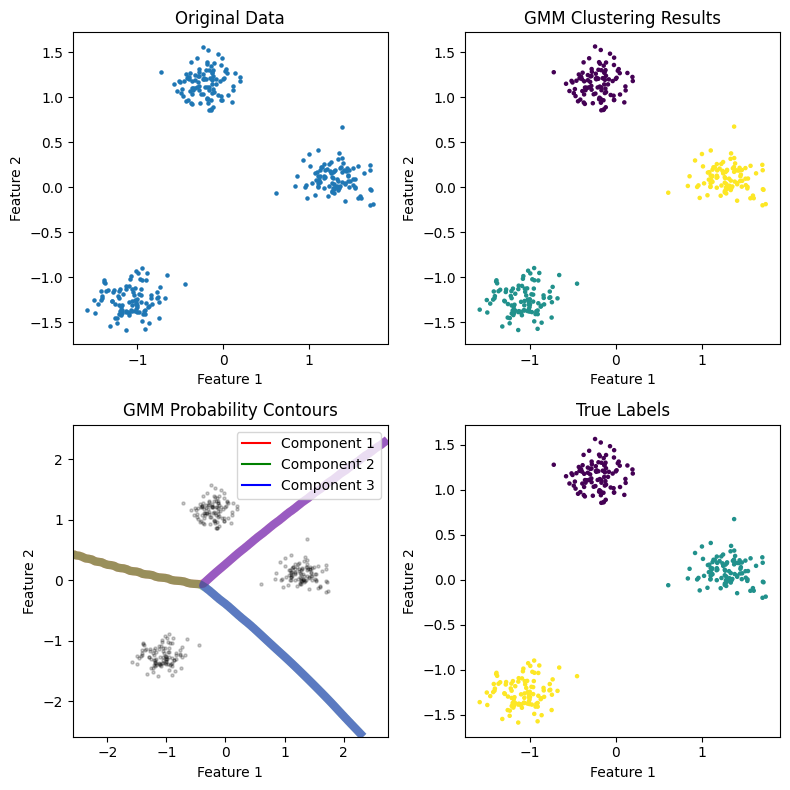

Analysis complete!


In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

def generate_data(n_samples=300, n_features=2, centers=3, cluster_std=1.0):
    """
    Generate sample data for clustering.

    This function creates artificial data points that form clusters.
    It's useful for testing clustering algorithms.

    Parameters:
    - n_samples: Number of data points to generate (default: 300)
    - n_features: Number of features for each data point (default: 2)
    - centers: Number of clusters to generate (default: 3)
    - cluster_std: Standard deviation of the clusters (default: 1.0)

    Returns:
    - X: Generated data points
    - y: True labels of the generated data (not used in unsupervised learning, but useful for evaluation)
    """
    # n_samples: The number of samples to generate.
    # n_features: The number of features for each sample.
    # centers: The number of centers (clusters) to generate.
    # cluster_std: The standard deviation of the clusters.
    # random_state: The random state for reproducibility.
    X, y = make_blobs(n_samples=n_samples, 
                      n_features=n_features, 
                      centers=centers, 
                      cluster_std=cluster_std, 
                      random_state=42)
    return X, y

def preprocess_data(X):
    """
    Preprocess the data by scaling features.

    This function standardizes the features by removing the mean and scaling to unit variance.
    Standardization is important for many machine learning algorithms to work properly.

    Parameters:
    - X: Input data to be scaled

    Returns:
    - X_scaled: Scaled version of the input data
    """
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Fit the scaler to the data and transform the data
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def perform_gmm(X, n_components):
    """
    Perform Gaussian Mixture Model clustering.

    This function fits a Gaussian Mixture Model to the input data.

    Parameters:
    - X: Input data
    - n_components: Number of Gaussian components (clusters) to use

    Returns:
    - gmm: Fitted Gaussian Mixture Model
    """
    # Initialize the GaussianMixture model
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    
    # Fit the model to the data
    gmm.fit(X)
    
    return gmm

def plot_results(X, gmm, true_labels=None):
    """
    Plot the results of GMM clustering.

    This function creates a 2x2 subplot to visualize:
    1. Original data
    2. GMM clustering results
    3. GMM probability contours (each component in a different color)
    4. True labels (if provided)

    Parameters:
    - X: Input data
    - gmm: Fitted Gaussian Mixture Model
    - true_labels: True cluster labels (if available)
    """
    # Create a 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    
    # Flatten the axs array for easier indexing
    axs = axs.ravel()
    
    # Plot 1: Original Data
    axs[0].scatter(X[:, 0], X[:, 1], s=5)
    axs[0].set_title('Original Data')
    axs[0].set_xlabel('Feature 1')
    axs[0].set_ylabel('Feature 2')

    # Plot 2: GMM Clustering Results
    labels = gmm.predict(X)
    axs[1].scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
    axs[1].set_title('GMM Clustering Results')
    axs[1].set_xlabel('Feature 1')
    axs[1].set_ylabel('Feature 2')

    # Plot 3: GMM Probability Contours
    # Create a mesh grid
    x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    y = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    XX, YY = np.meshgrid(x, y)
    XY = np.column_stack([XX.ravel(), YY.ravel()])
    
    # Get probabilities for each component
    # predict_proba returns the probability of each data point belonging to each component
    # reshape the result to match the shape of the mesh grid
    Z = gmm.predict_proba(XY).reshape(XX.shape + (gmm.n_components,))
    
    # Plot contours for each component
    # Z[:,:,i] extracts the probability of each component
    # levels=[0.5] sets the contour level to 0.5
    # colors=[colors[i]] sets the color of the contour to the corresponding color
    # alpha=0.4 sets the transparency of the contour
    # linewidths=6 sets the width of the contour line
    colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'magenta']  # Add more colors if needed
    for i in range(gmm.n_components):
        axs[2].contour(XX, YY, Z[:,:,i], levels=[0.5], colors=[colors[i]], alpha=0.4, linewidths=6)
    
    # Plot the original data points
    axs[2].scatter(X[:, 0], X[:, 1], s=5, c='black', alpha=0.2)
    axs[2].set_title('GMM Probability Contours')
    axs[2].set_xlabel('Feature 1')
    axs[2].set_ylabel('Feature 2')
        
    # Add a legend
    for i in range(gmm.n_components):
        axs[2].plot([], [], color=colors[i], label=f'Component {i+1}')
    axs[2].legend()

    # Plot 4: True Labels (if provided)
    if true_labels is not None:
        axs[3].scatter(X[:, 0], X[:, 1], c=true_labels, s=5, cmap='viridis')
        axs[3].set_title('True Labels')
        axs[3].set_xlabel('Feature 1')
        axs[3].set_ylabel('Feature 2')
    else:
        axs[3].axis('off')  # Turn off the fourth subplot if true labels are not provided

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to demonstrate Gaussian Mixture Model clustering.

    This function orchestrates the entire process:
    1. Generates sample data
    2. Preprocesses the data
    3. Performs GMM clustering
    4. Visualizes the results
    """
    print("Generating data...")
    X, true_labels = generate_data()

    print("Preprocessing data...")
    X_scaled = preprocess_data(X)

    print("Performing GMM clustering...")
    n_components = 3  # Number of clusters to use
    gmm = perform_gmm(X_scaled, n_components)

    print("Plotting results...")
    plot_results(X_scaled, gmm, true_labels)

    print("Analysis complete!")

# This is the entry point of the script
if __name__ == "__main__":
    main()

# Exercise: Comparing K-means and Gaussian Mixture Models (GMM)
---

In this exercise, you will compare the performance of K-means clustering and Gaussian Mixture Models (GMM) using the silhouette score as a metric. This will help you understand the strengths and weaknesses of each algorithm on different types of data.

## Objective

Your task is to implement both K-means and GMM on various datasets and compare their performance using the silhouette score.

## Steps

1. **Data Generation**: Create three different datasets:
   a. A dataset with well-separated, spherical clusters
   b. A dataset with overlapping, spherical clusters
   c. A dataset with non-spherical (e.g., elliptical or moon-shaped) clusters

2. **Implementation**:
   - Implement K-means clustering
   - Implement Gaussian Mixture Model clustering
   - Calculate the silhouette score for each algorithm on each dataset

3. **Comparison**:
   - Compare the silhouette scores of K-means and GMM for each dataset
   - Visualize the clustering results for both algorithms on each dataset



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler

def generate_data(data_type, n_samples=300):
    """
    Generate different types of datasets for clustering analysis.

    This function creates datasets with different characteristics to test
    the performance of clustering algorithms under various conditions.

    Parameters:
    data_type (str): Type of dataset to generate. Options are:
                     'well_separated', 'overlapping', or 'non_spherical'.
    n_samples (int): Number of samples to generate. Default is 300.

    Returns:
    tuple: A tuple containing two elements:
           - X (numpy.ndarray): The generated data points.
           - y (numpy.ndarray): The true labels (only for reference, not used in clustering).

    Raises:
    ValueError: If an invalid data_type is provided.
    """
    if data_type == 'well_separated':
        # Generate well-separated, spherical clusters
        return make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, random_state=0)
    elif data_type == 'overlapping':
        # Generate overlapping, spherical clusters
        return make_blobs(n_samples=n_samples, centers=3, cluster_std=1.2, random_state=0)
    elif data_type == 'non_spherical':
        # Generate non-spherical (moon-shaped) clusters
        return make_moons(n_samples=n_samples, noise=0.05, random_state=0)
    else:
        raise ValueError("Invalid data_type. Choose 'well_separated', 'overlapping', or 'non_spherical'.")

def preprocess_data(X):
    """
    Preprocess the data by scaling features.

    This function standardizes the features by removing the mean and scaling to unit variance.
    Preprocessing is crucial for many machine learning algorithms to work effectively.

    Parameters:
    X (numpy.ndarray): Input data to be preprocessed.

    Returns:
    numpy.ndarray: Preprocessed (scaled) data.
    """
    # TODO: Implement data preprocessing using StandardScaler
    # Hint: Use StandardScaler from sklearn.preprocessing
    pass

def perform_kmeans(X, n_clusters):
    """
    Perform K-means clustering on the input data.

    This function applies the K-means algorithm to cluster the input data
    and calculates the silhouette score for the clustering result.

    Parameters:
    X (numpy.ndarray): Input data for clustering.
    n_clusters (int): Number of clusters to form.

    Returns:
    tuple: A tuple containing two elements:
           - labels (numpy.ndarray): Cluster labels for each data point.
           - score (float): Silhouette score of the clustering.
    """
    # TODO: Implement K-means clustering
    # Hint: Use KMeans from sklearn.cluster
    # Don't forget to calculate the silhouette score
    pass

def perform_gmm(X, n_components):
    """
    Perform Gaussian Mixture Model (GMM) clustering on the input data.

    This function applies the GMM algorithm to cluster the input data
    and calculates the silhouette score for the clustering result.

    Parameters:
    X (numpy.ndarray): Input data for clustering.
    n_components (int): Number of Gaussian components (clusters) to use.

    Returns:
    tuple: A tuple containing two elements:
           - labels (numpy.ndarray): Cluster labels for each data point.
           - score (float): Silhouette score of the clustering.
    """
    # TODO: Implement GMM clustering
    # Hint: Use GaussianMixture from sklearn.mixture
    # Don't forget to calculate the silhouette score
    pass

def plot_results(X, kmeans_labels, gmm_labels, title):
    """
    Plot the clustering results for both K-means and GMM.

    This function creates a side-by-side comparison of the clustering results
    from K-means and GMM algorithms.

    Parameters:
    X (numpy.ndarray): Input data points.
    kmeans_labels (numpy.ndarray): Cluster labels from K-means.
    gmm_labels (numpy.ndarray): Cluster labels from GMM.
    title (str): Title for the plot.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot K-means results
    ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
    ax1.set_title('K-means Clustering')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    
    # Plot GMM results
    ax2.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
    ax2.set_title('GMM Clustering')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to orchestrate the clustering analysis.

    This function generates different types of datasets, applies K-means and GMM
    clustering algorithms, and compares their performance using silhouette scores.
    """
    data_types = ['well_separated', 'overlapping', 'non_spherical']
    n_clusters = 3

    for data_type in data_types:
        # Generate and preprocess data
        X, _ = generate_data(data_type)
        X_scaled = preprocess_data(X)
        
        # Perform clustering
        kmeans_labels, kmeans_score = perform_kmeans(X_scaled, n_clusters)
        gmm_labels, gmm_score = perform_gmm(X_scaled, n_clusters)
        
        # Print results
        print(f"Dataset: {data_type}")
        print(f"K-means Silhouette Score: {kmeans_score:.4f}")
        print(f"GMM Silhouette Score: {gmm_score:.4f}")
        print()
        
        # Plot results
        plot_results(X, kmeans_labels, gmm_labels, f"Clustering Results: {data_type}")

if __name__ == "__main__":
    main()

TypeError: cannot unpack non-iterable NoneType object

### Solution
---



Dataset: well_separated
K-means Silhouette Score: 0.6055
GMM Silhouette Score: 0.6045



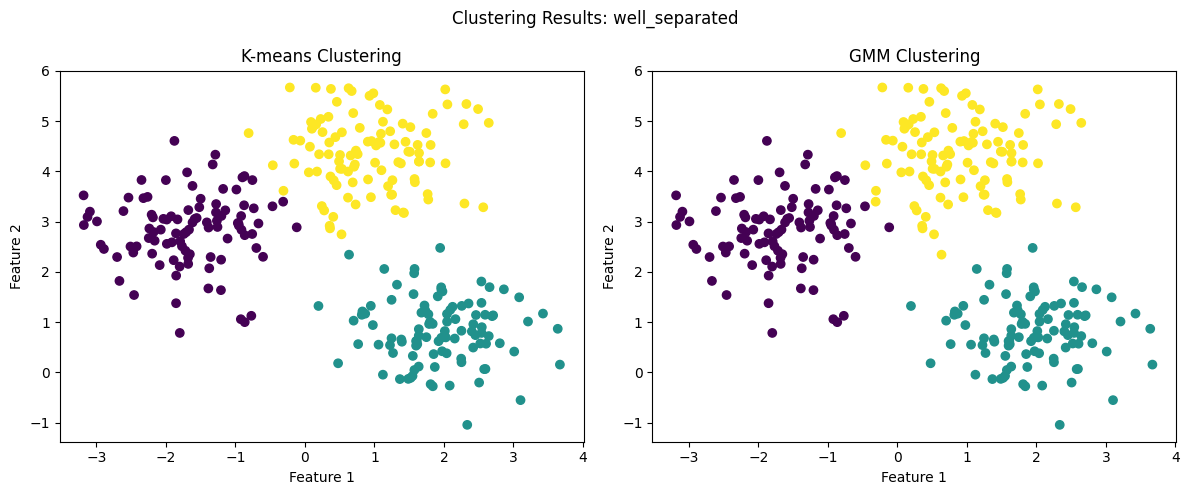

Dataset: overlapping
K-means Silhouette Score: 0.4398
GMM Silhouette Score: 0.4364



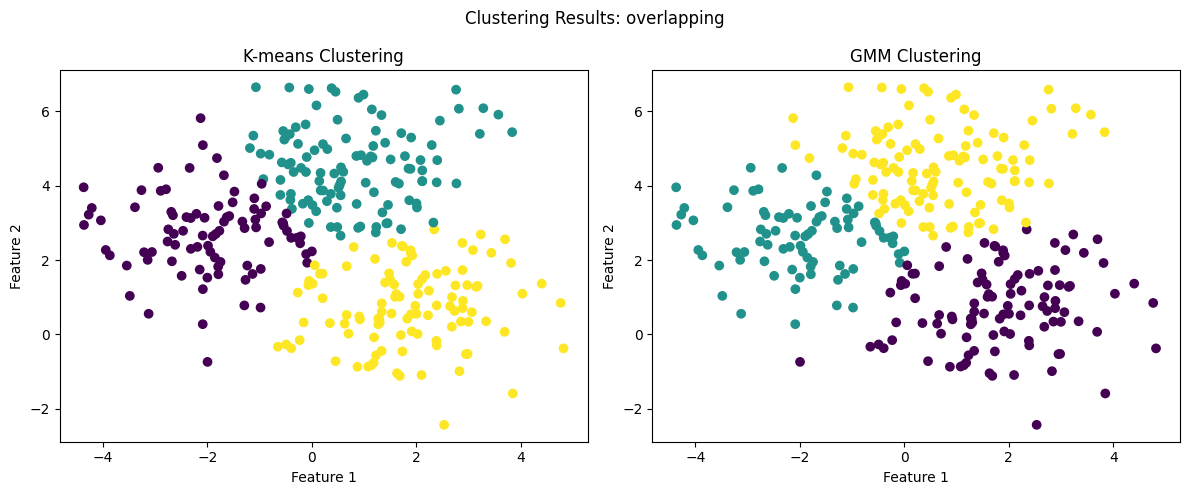

Dataset: non_spherical
K-means Silhouette Score: 0.4474
GMM Silhouette Score: 0.2278



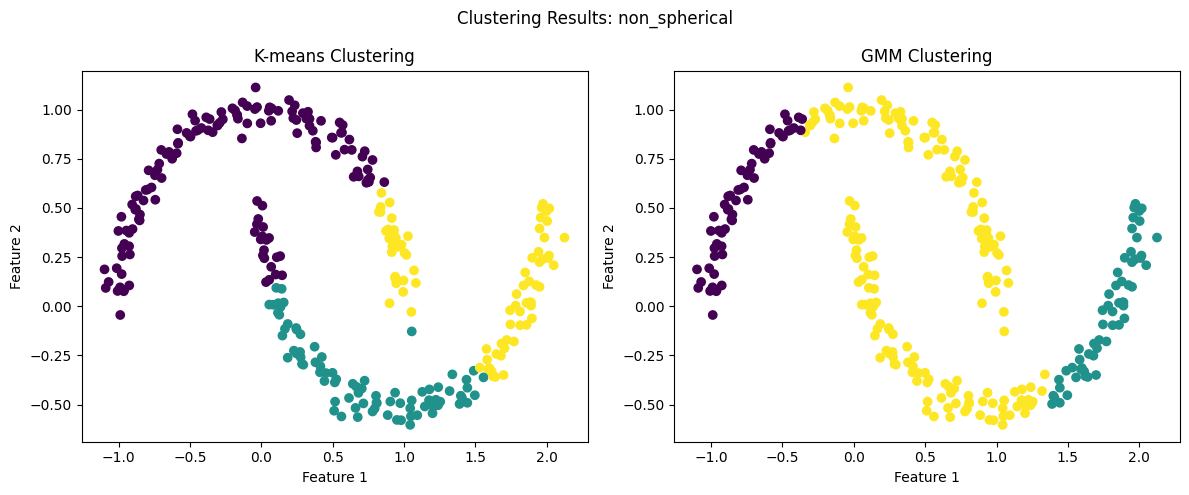

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler

def generate_data(data_type, n_samples=300):
    """
    Generate different types of datasets for clustering analysis.

    Parameters:
    data_type (str): Type of dataset to generate.
    n_samples (int): Number of samples to generate.

    Returns:
    tuple: (X, y) where X is the data and y is the true labels.
    """
    if data_type == 'well_separated':
        # Generate well-separated, spherical clusters
        # cluster_std=0.7 ensures that the clusters are distinct
        return make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, random_state=0)
    elif data_type == 'overlapping':
        # Generate overlapping, spherical clusters
        # cluster_std=1.2 creates clusters that overlap
        return make_blobs(n_samples=n_samples, centers=3, cluster_std=1.2, random_state=0)
    elif data_type == 'non_spherical':
        # Generate non-spherical (moon-shaped) clusters
        # noise=0.05 adds a small amount of random noise to the perfect half-circle shape
        return make_moons(n_samples=n_samples, noise=0.05, random_state=0)
    else:
        raise ValueError("Invalid data_type. Choose 'well_separated', 'overlapping', or 'non_spherical'.")

def preprocess_data(X):
    """
    Preprocess the data by scaling features.

    Parameters:
    X (numpy.ndarray): Input data to be preprocessed.

    Returns:
    numpy.ndarray: Preprocessed (scaled) data.
    """
    # Initialize the StandardScaler
    # StandardScaler removes the mean and scales to unit variance
    scaler = StandardScaler()
    
    # Fit the scaler to the data and transform it
    # fit_transform() combines fitting (computing the mean and variance) and transforming (scaling) in one step
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled

def perform_kmeans(X, n_clusters):
    """
    Perform K-means clustering on the input data.

    Parameters:
    X (numpy.ndarray): Input data for clustering.
    n_clusters (int): Number of clusters to form.

    Returns:
    tuple: (labels, score) where labels are cluster assignments and score is the silhouette score.
    """
    # Initialize KMeans
    # n_init=10 means the algorithm will be run 10 times with different centroid seeds
    # The result with the lowest inertia (sum of squared distances to centroids) is selected
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    
    # Fit the model and predict cluster labels
    # fit_predict() combines fitting the model and predicting labels in one step
    labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    # Silhouette score measures how similar an object is to its own cluster compared to other clusters
    # The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster
    score = silhouette_score(X, labels)
    
    return labels, score

def perform_gmm(X, n_components):
    """
    Perform Gaussian Mixture Model (GMM) clustering on the input data.

    Parameters:
    X (numpy.ndarray): Input data for clustering.
    n_components (int): Number of Gaussian components (clusters) to use.

    Returns:
    tuple: (labels, score) where labels are cluster assignments and score is the silhouette score.
    """
    # Initialize GaussianMixture
    # n_init=10 means the algorithm will be run 10 times with different initializations
    # The result with the highest log-likelihood is selected
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=0)
    
    # Fit the model and predict cluster labels
    # fit_predict() first fits the model to the data, then predicts the most likely component for each sample
    labels = gmm.fit_predict(X)
    
    # Calculate silhouette score
    # We use the same silhouette score as for K-means to allow direct comparison
    score = silhouette_score(X, labels)
    
    return labels, score

def plot_results(X, kmeans_labels, gmm_labels, title):
    """
    Plot the clustering results for both K-means and GMM.

    Parameters:
    X (numpy.ndarray): Input data points.
    kmeans_labels (numpy.ndarray): Cluster labels from K-means.
    gmm_labels (numpy.ndarray): Cluster labels from GMM.
    title (str): Title for the plot.
    """
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot K-means results
    # c=kmeans_labels colors each point according to its cluster assignment
    # cmap='viridis' specifies the color scheme
    ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
    ax1.set_title('K-means Clustering')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    
    # Plot GMM results
    # Similar to K-means plot, but using GMM labels
    ax2.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
    ax2.set_title('GMM Clustering')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    
    # Set the overall title for the figure
    fig.suptitle(title)
    
    # Adjust the layout to prevent overlapping
    plt.tight_layout()
    
    # Display the plot
    plt.show()

def main():
    """
    Main function to orchestrate the clustering analysis.
    """
    # Define the types of datasets we'll be working with
    data_types = ['well_separated', 'overlapping', 'non_spherical']
    
    # Set the number of clusters (this should match the number of true clusters in the data)
    n_clusters = 3

    # Iterate over each data type
    for data_type in data_types:
        # Generate data
        X, _ = generate_data(data_type)
        
        # Preprocess (scale) the data
        X_scaled = preprocess_data(X)
        
        # Perform K-means clustering
        kmeans_labels, kmeans_score = perform_kmeans(X_scaled, n_clusters)
        
        # Perform GMM clustering
        gmm_labels, gmm_score = perform_gmm(X_scaled, n_clusters)
        
        # Print results
        print(f"Dataset: {data_type}")
        print(f"K-means Silhouette Score: {kmeans_score:.4f}")
        print(f"GMM Silhouette Score: {gmm_score:.4f}")
        print()  # Print a blank line for readability
        
        # Plot results
        plot_results(X, kmeans_labels, gmm_labels, f"Clustering Results: {data_type}")

# This is the entry point of the script
# It ensures that the main() function is only run if this script is executed directly
# (not imported as a module)
if __name__ == "__main__":
    main()